# GSE102048
## Xiaonan Wang
## 05Jun2022

In [1]:
#%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
import anndata
import seaborn as sns

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)

/nfs01data1/Groups/Wangxiaonan/programs/miniconda3/envs/scanpy171/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.7.1 anndata==0.7.8 umap==0.5.3 numpy==1.19.5 scipy==1.5.4 pandas==1.1.5 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.6


# Data in

In [2]:
FileDir = '/nfs01data1/Groups/Wangxiaonan/share/rev_MI/GSE102048/'

In [3]:
Smat = pd.read_csv('./GSE102048_series_matrix.txt', sep='\t', skiprows=44).T

In [4]:
Smat.head(2)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
!Sample_title,!Sample_geo_accession,!Sample_status,!Sample_submission_date,!Sample_last_update_date,!Sample_type,!Sample_channel_count,!Sample_source_name_ch1,!Sample_organism_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,...,!Sample_instrument_model,!Sample_library_selection,!Sample_library_source,!Sample_library_strategy,!Sample_relation,!Sample_relation,!Sample_supplementary_file_1,!series_matrix_table_begin,ID_REF,!series_matrix_table_end
"Extracted RNA from Ki67-RFP+ cells of hearts of Ki67TagRFP mice 14 days post-MI surgery, replicate 1_bulk RNA",GSM2722416,Public on Dec 04 2018,Jul 31 2017,May 15 2019,SRA,1,Ki67-RFP+ cells of hearts of Ki67TagRFP mice 1...,Mus musculus,strain background: C57BL/6,genotype/variation: Ki67TagRFP,...,Illumina NextSeq 500,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2722...,NaN,GSM2722416,NaN


In [5]:
Smat.shape

(64, 41)

In [4]:
Smat = Smat.loc[[x for x in Smat.index if 'bulk' not in x],:].copy()

In [7]:
Smat.shape

(55, 41)

In [5]:
Smat.columns = Smat.iloc[0,:]

In [6]:
Smat = Smat.drop('!Sample_title')

In [10]:
Smat.head(2)

!Sample_title,!Sample_geo_accession,!Sample_status,!Sample_submission_date,!Sample_last_update_date,!Sample_type,!Sample_channel_count,!Sample_source_name_ch1,!Sample_organism_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,...,!Sample_instrument_model,!Sample_library_selection,!Sample_library_source,!Sample_library_strategy,!Sample_relation,!Sample_relation,!Sample_supplementary_file_1,!series_matrix_table_begin,ID_REF,!series_matrix_table_end
RFPMIRemA1,GSM3501487,Public on Dec 05 2018,Dec 04 2018,Dec 12 2018,SRA,1,Extracted RNA from Ki67-RFP+ or Ki67-RFP- cell...,Mus musculus,strain background: C57BL/6,genotype/variation: Ki67TagRFP,...,Illumina NextSeq 500,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3501...,NaN,GSM3501487,NaN
RFPMIRemA2,GSM3501488,Public on Dec 05 2018,Dec 04 2018,Dec 12 2018,SRA,1,Extracted RNA from Ki67-RFP+ or Ki67-RFP- cell...,Mus musculus,strain background: C57BL/6,genotype/variation: Ki67TagRFP,...,Illumina NextSeq 500,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3501...,NaN,GSM3501488,NaN


In [11]:
Smat.columns

Index(['!Sample_geo_accession', '!Sample_status', '!Sample_submission_date',
       '!Sample_last_update_date', '!Sample_type', '!Sample_channel_count',
       '!Sample_source_name_ch1', '!Sample_organism_ch1',
       '!Sample_characteristics_ch1', '!Sample_characteristics_ch1',
       '!Sample_characteristics_ch1', '!Sample_characteristics_ch1',
       '!Sample_characteristics_ch1', '!Sample_molecule_ch1',
       '!Sample_extract_protocol_ch1', '!Sample_extract_protocol_ch1',
       '!Sample_taxid_ch1', '!Sample_description', '!Sample_description',
       '!Sample_data_processing', '!Sample_data_processing',
       '!Sample_data_processing', '!Sample_platform_id',
       '!Sample_contact_name', '!Sample_contact_email',
       '!Sample_contact_institute', '!Sample_contact_address',
       '!Sample_contact_city', '!Sample_contact_zip/postal_code',
       '!Sample_contact_country', '!Sample_data_row_count',
       '!Sample_instrument_model', '!Sample_library_selection',
       '!Sample_l

In [7]:
meta1 = Smat.iloc[:, [0,7,8,9,10,11,12,17]].copy()

In [13]:
meta1.head(2)

!Sample_title,!Sample_geo_accession,!Sample_organism_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_description
RFPMIRemA1,GSM3501487,Mus musculus,strain background: C57BL/6,genotype/variation: Ki67TagRFP,time point: 14 days post-MI,tissue: Heart,heart region: remote area,Murine hearts 14 days after myocardial infarction
RFPMIRemA2,GSM3501488,Mus musculus,strain background: C57BL/6,genotype/variation: Ki67TagRFP,time point: 14 days post-MI,tissue: Heart,heart region: remote area,Murine hearts 14 days after myocardial infarction


In [8]:
meta = pd.DataFrame([])

In [9]:
meta['Index'] = meta1['!Sample_geo_accession']
meta['Organism'] = meta1['!Sample_organism_ch1']
meta['Strain'] = 'C57BL/6'
meta['Tissue'] = 'ventricles'

In [10]:
meta['Genotype'] = [x.split(':')[1].lstrip().replace('wildtype', 'WT') for x in meta1.iloc[:,3]]

In [11]:
meta['CellType'] = [str(x).split(':')[1].lstrip() if ':' in str(x) else 'heart' for x in meta1.iloc[:,6]]

In [12]:
meta['Development_stage'] = ['adult' if '14' in x else x.split(':')[1].lstrip().replace('Neonatal', 'neonatal').replace('neonate', 'neonatal')  for x in meta1.iloc[:,4]]

In [13]:
meta['Age'] = ['8' if 'adult' in x else '1' for x in meta['Development_stage']]

In [14]:
Condition = np.array([])
for x in meta1.iloc[:,7]:
    if 'infarction' in x:
        Condition = np.append(Condition, 'MI')
    elif 'sham' in x:
        Condition = np.append(Condition, 'Sham')
    elif 'murine heart' in x:
        Condition = np.append(Condition, 'WT')
    elif 'ischemia' in x:
        Condition = np.append(Condition, 'IR')
    else:
        Condition = np.append(Condition, 'NA')
print(Condition)

['MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'Sham' 'Sham' 'Sham' 'Sham'
 'Sham' 'Sham' 'Sham' 'Sham' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'WT'
 'WT' 'WT' 'WT' 'WT' 'WT' 'WT' 'WT' 'WT' 'WT' 'WT' 'WT' 'WT' 'WT' 'WT'
 'Sham' 'MI' 'IR' 'Sham' 'WT' 'WT' 'WT' 'IR' 'WT' 'WT' 'MI' 'Sham' 'IR'
 'WT' 'WT']


In [15]:
meta['Condition'] = Condition

In [16]:
meta['Day'] = [0 if 'WT' in x else 14 for x in meta['Condition']]

In [23]:
meta1.index

Index(['RFPMIRemA1', 'RFPMIRemA2', 'RFPMIRemA3', 'RFPMIRemA4', 'RFPMIInfB1',
       'RFPMIInfB2', 'RFPMIInfB3', 'RFPMIInfB4', 'RFPSHApC1', 'RFPSHApC2',
       'RFPSHApC3', 'RFPSHApC4', 'RFPSHInfD1', 'RFPSHInfD2', 'RFPSHInfD3',
       'RFPSHInfD4', 'RFPMIInfE1', 'RFPMIInfE2', 'RFPMIInfE3', 'RFPMIInfE4',
       'RFPMIRemF1', 'RFPMIRemF2', 'RFPMIRemF3', 'RFPMIRemF4', 'RFPadultG1',
       'RFPadultG2', 'RFPadultH1', 'RFPadultH2', 'RFPadultH3', 'RFPadultH4',
       'WTneoI', 'WTadultJ1', 'WTadultJ2', 'WTadultJ3', 'WTadultJ4',
       'WTadultK1', 'WTadultK2', 'WTadultK3', 'WTadultK4', 'RFPSHInfL',
       'RFPMIInfM', 'RFPIRInfN', 'RFPSHInfO', 'RFPadultP', 'RFPadultQ',
       'RFPadultR', 'RFPIRInfS', 'WTadultT', 'RFPneoU', 'WTMIInfV',
       'RFPSHInfW', 'RFPIRInfX', 'WTadultY', 'RFPadultZ'],
      dtype='object')

In [17]:
meta['Replicate'] = [x[-2:] if re.compile(r".*[0-9]$").match(x) else x[-1:] for x in meta1.index]

In [18]:
meta

,Index,Organism,Strain,Tissue,Genotype,CellType,Development_stage,Age,Condition,Day,Replicate
RFPMIRemA1,GSM3501487,Mus musculus,C57BL/6,ventricles,Ki67TagRFP,remote area,adult,8,MI,14,A1
RFPMIRemA2,GSM3501488,Mus musculus,C57BL/6,ventricles,Ki67TagRFP,remote area,adult,8,MI,14,A2
RFPMIRemA3,GSM3501489,Mus musculus,C57BL/6,ventricles,Ki67TagRFP,remote area,adult,8,MI,14,A3
RFPMIRemA4,GSM3501490,Mus musculus,C57BL/6,ventricles,Ki67TagRFP,remote area,adult,8,MI,14,A4
RFPMIInfB1,GSM3501491,Mus musculus,C57BL/6,ventricles,Ki67TagRFP,infarcted area,adult,8,MI,14,B1
RFPMIInfB2,GSM3501492,Mus musculus,C57BL/6,ventricles,Ki67TagRFP,infarcted area,adult,8,MI,14,B2
RFPMIInfB3,GSM3501493,Mus musculus,C57BL/6,ventricles,Ki67TagRFP,infarcted area,adult,8,MI,14,B3
RFPMIInfB4,GSM3501494,Mus musculus,C57BL/6,ventricles,Ki67TagRFP,infarcted area,adult,8,MI,14,B4
RFPSHApC1,GSM3501495,Mus musculus,C57BL/6,ventricles,Ki67TagRFP,remote area,adult,8,Sham,14,C1
RFPSHApC2,GSM3501496,Mus musculus,C57BL/6,ventricles,Ki67TagRFP,remote area,adult,8,Sham,14,C2


In [26]:
# renamed all files from csv to tsv
Files = [x for x in listdir(FileDir) if 'tsv' in x]
print(Files[0:5])

['GSM2722421_Ki67_7dpMI_1910-M03.coutb.tsv', 'GSM2722422_Ki67_7dpMI_1910-M04.coutb.tsv', 'GSM3501487_RFPMIRemA1.coutt.tsv', 'GSM3501488_RFPMIRemA2.coutt.tsv', 'GSM3501489_RFPMIRemA3.coutt.tsv']


In [27]:
adata = []
for idx, row in meta.iterrows():
    FN = [x for x in Files if row['Index'] in x][0]
    adata_sub = sc.read(FileDir + FN,  cache=True).T
    adata_sub.obs['Index'] = row['Index']
    adata_sub.obs['Day'] = row['Day']
    adata_sub.obs['Condition'] = row['Condition']
    adata_sub.obs['Genotype'] = row['Genotype']
    adata_sub.obs['CellType'] = row['CellType']
    adata_sub.obs['Organism'] = row['Organism']
    adata_sub.obs['Strain'] = row['Strain']
    adata_sub.obs['Development_stage'] = row['Development_stage']
    adata_sub.obs['Tissue'] = row['Tissue']
    adata_sub.obs['Replicate'] = row['Replicate']
    adata_sub.obs['Age'] = row['Age']
    adata_sub.obs['StudyID'] = row['Index']
    adata_sub.obs_names = [row['Index']+'_'+row['Condition']+'_'+str(row['Day'])+'_'+row['Replicate']+'_'+str(x) for x in adata_sub.obs_names]
    adata_sub = adata_sub[:,1:].copy()
    adata_sub.var_names = [x.split('__')[0] for x in adata_sub.var_names]
    ERCCs = [x for x in adata_sub.var_names if 'ERCC-' in x]
    adata_sub = adata_sub[:,~np.in1d(adata_sub.var_names, ERCCs)]
    adata_sub.var_names_make_unique()
    adata.append(adata_sub)
    del adata_sub

... reading from cache file cache/nfs01data1-Groups-Wangxiaonan-share-rev_MI-GSE102048-GSM3501487_RFPMIRemA1.coutt.h5ad
... reading from cache file cache/nfs01data1-Groups-Wangxiaonan-share-rev_MI-GSE102048-GSM3501488_RFPMIRemA2.coutt.h5ad
... reading from cache file cache/nfs01data1-Groups-Wangxiaonan-share-rev_MI-GSE102048-GSM3501489_RFPMIRemA3.coutt.h5ad
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... reading from cache file cache/nfs01data1-Groups-Wangxiaonan-share-rev_MI-GSE102048-GSM3501490_RFPMIRemA4.coutt.h5ad
... reading from cache file cache/nfs01data1-Groups-Wangxiaonan-share-rev_MI-GSE102048-GSM3501491_RFPMIInfB1.coutt.h5ad
... reading from cache file cache/nfs01data1-Groups-Wangxiaonan-share-rev_MI-GSE102048-GSM3501492_RFPMIInfB2.coutt.h5ad
... reading from cache file cache/nfs01data1-Groups-Wangxiaonan-share-rev_MI-GSE102048-GSM3501493_RFPMIInfB3.coutt

In [28]:
#combine and save the raw counts
adata1 = anndata.AnnData.concatenate(*adata, join='outer', fill_value=0)

In [29]:
adata1.shape

(9504, 20408)

In [30]:
sc.pp.filter_genes(adata1, min_cells=1)

In [31]:
# normalisation
sc.pp.normalize_per_cell(adata1, counts_per_cell_after=1e4)

normalizing by total count per cell
filtered out 258 cells that have less than 1 counts
    finished (0:00:01): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [32]:
# log counts
sc.pp.log1p(adata1)

In [33]:
adata1.raw = adata1

In [34]:
adata1.write('./write/GSE102048_lognorm.h5ad')

... storing 'Index' as categorical
... storing 'Condition' as categorical
... storing 'Genotype' as categorical
... storing 'CellType' as categorical
... storing 'Organism' as categorical
... storing 'Strain' as categorical
... storing 'Development_stage' as categorical
... storing 'Tissue' as categorical
... storing 'Replicate' as categorical
... storing 'Age' as categorical
... storing 'StudyID' as categorical


# Cell Cycle Assignment

In [35]:
adata = sc.read('./write/GSE102048_lognorm.h5ad')

In [36]:
print(adata.shape)

(9246, 20408)


In [37]:
cell_cycle_genes = [x.strip()[0].upper()+x.strip()[1:].lower() for x in open('/nfs01data1/Groups/Wangxiaonan/Lab_members/Files/regev_lab_cell_cycle_genes.txt')]
print(len(cell_cycle_genes))

97


In [38]:
np.setdiff1d(cell_cycle_genes, adata.raw.var_names)

array(['Mlf1ip'], dtype='<U8')

In [39]:
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
print('Number of s_genes: '+str(len(s_genes)))
print('Number of g2m_genes: '+str(len(g2m_genes)))
print('Total number of cell cycle genes: '+str(len(cell_cycle_genes)))

Number of s_genes: 43
Number of g2m_genes: 54
Total number of cell cycle genes: 97


In [40]:
ERR = adata.obs['StudyID'].cat.categories
print(ERR)

Index(['GSM3501487', 'GSM3501488', 'GSM3501489', 'GSM3501490', 'GSM3501491',
       'GSM3501492', 'GSM3501493', 'GSM3501494', 'GSM3501495', 'GSM3501496',
       'GSM3501497', 'GSM3501498', 'GSM3501499', 'GSM3501500', 'GSM3501501',
       'GSM3501502', 'GSM3501503', 'GSM3501504', 'GSM3501505', 'GSM3501506',
       'GSM3501507', 'GSM3501508', 'GSM3501509', 'GSM3501510', 'GSM3501511',
       'GSM3501512', 'GSM3501513', 'GSM3501514', 'GSM3501515', 'GSM3501516',
       'GSM3501517', 'GSM3501518', 'GSM3501519', 'GSM3501520', 'GSM3501521',
       'GSM3501522', 'GSM3501523', 'GSM3501524', 'GSM3501525', 'GSM3508674',
       'GSM3508675', 'GSM3508676', 'GSM3508677', 'GSM3508678', 'GSM3508679',
       'GSM3508680', 'GSM3508681', 'GSM3508682', 'GSM3508683', 'GSM3508684',
       'GSM3508685', 'GSM3508686', 'GSM3508687', 'GSM3508688'],
      dtype='object')


In [41]:
phase = []
for i in range(len(ERR)):
    adata_sub = adata[adata.obs['StudyID'] == ERR[i]].copy()
    print(adata_sub.shape)
    sc.pp.scale(adata_sub)
    sc.tl.score_genes_cell_cycle(adata_sub, s_genes=s_genes, g2m_genes=g2m_genes, use_raw=False)
    phase.append(adata_sub.obs[['phase', 'S_score', 'G2M_score']])

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    427 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    470 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(96, 20408)
(96, 20408)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    557 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    429 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(96, 20408)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    524 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    553 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    473 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    470 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    513 total control genes are used. (0:00:00)
computing score 'G2M_score'


(96, 20408)
(96, 20408)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    472 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    429 total control genes are used. (0:00:00)
computing score 'G2M_score'


(96, 20408)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    472 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    426 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    471 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    382 total control genes are used. (0:00:00)
computing score 'G2M_score'


(95, 20408)
(96, 20408)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    426 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    471 total control genes are used. (0:00:00)
computing score 'G2M_score'


(96, 20408)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    429 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    515 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    515 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    555 total control genes are used. (0:00:00)
computing score 'G2M_score'


(96, 20408)
(96, 20408)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    599 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    557 total control genes are used. (0:00:00)


(96, 20408)


computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    515 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    300 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    344 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    472 total control genes are used. (0:00:00)
computing score 'G2M_score'


(95, 20408)
(96, 20408)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    515 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    172 total control genes are used. (0:00:00)
computing score 'G2M_score'


(95, 20408)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    222 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    384 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    343 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    558 total control genes are used. (0:00:00)
computing score 'G2M_score'


(95, 20408)
(96, 20408)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    685 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    557 total control genes are used. (0:00:00)
computing score 'G2M_score'


(96, 20408)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    601 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    516 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    559 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    472 total control genes are used. (0:00:00)
computing score 'G2M_score'


(96, 20408)
(96, 20408)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    470 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    559 total control genes are used. (0:00:00)
computing score 'G2M_score'


(96, 20408)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    606 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    556 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    557 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    515 total control genes are used. (0:00:00)
computing score 'G2M_score'


(96, 20408)
(96, 20408)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    602 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    601 total control genes are used. (0:00:00)
computing score 'G2M_score'


(96, 20408)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    687 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    430 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    342 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    387 total control genes are used. (0:00:00)
computing score 'G2M_score'


(96, 20408)
(96, 20408)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    429 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    428 total control genes are used. (0:00:00)
computing score 'G2M_score'


(96, 20408)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    472 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    427 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    557 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'


(96, 20408)
(96, 20408)


    finished: added
    'S_score', score of gene set (adata.obs).
    472 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    510 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    300 total control genes are used. (0:00:00)


(96, 20408)


computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    470 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    599 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    596 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    342 total control genes are used. (0:00:00)
computing score 'G2M_score'


(96, 20408)
(96, 20408)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    343 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    386 total control genes are used. (0:00:00)
computing score 'G2M_score'


(96, 20408)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    428 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    257 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    301 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    384 total control genes are used. (0:00:00)
computing score 'G2M_score'


(95, 20408)
(96, 20408)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    426 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    430 total control genes are used. (0:00:00)
computing score 'G2M_score'


(95, 20408)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    430 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    471 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    429 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    429 total control genes are used. (0:00:00)
computing score 'G2M_score'


(93, 20408)
(95, 20408)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    473 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    386 total control genes are used. (0:00:00)
computing score 'G2M_score'


(93, 20408)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    429 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    436 total control genes are used. (0:00:00)
computing score 'G2M_score'


(309, 20408)


    finished: added
    'G2M_score', score of gene set (adata.obs).
    385 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(363, 20408)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    344 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    470 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(374, 20408)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    687 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    685 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(330, 20408)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    730 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    686 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(379, 20408)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    429 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    428 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(377, 20408)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    343 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    344 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(368, 20408)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    343 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    429 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(329, 20408)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    730 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    600 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(383, 20408)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    344 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    386 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(384, 20408)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    600 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    685 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(383, 20408)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    682 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    686 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    683 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    730 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(384, 20408)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    643 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    726 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(384, 20408)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    515 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    555 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


(384, 20408)
(384, 20408)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    644 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    687 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


In [42]:
phase_pd = pd.concat(phase)

In [43]:
phase_pd.head()

,phase,S_score,G2M_score
GSM3501487_MI_14_A1_0-0,G1,-0.128919,-0.924834
GSM3501487_MI_14_A1_1-0,G1,-0.125520,-0.025788
GSM3501487_MI_14_A1_2-0,G2M,0.043125,0.052836
GSM3501487_MI_14_A1_3-0,G2M,-0.100233,0.065013
GSM3501487_MI_14_A1_4-0,S,0.045424,0.028248


In [44]:
print(phase_pd.shape)

(9246, 3)


In [45]:
phase_pd.to_csv('cell_cycle_results.txt')

# Select highly variable genes

In [46]:
adata = sc.read('./write/GSE102048_lognorm.h5ad')

In [47]:
cell_cycle_results = pd.read_csv('cell_cycle_results.txt', index_col=0)
adata.obs = pd.concat([adata.obs, cell_cycle_results], axis=1)

In [48]:
adata.obs.head(3)

,Index,Day,Condition,Genotype,CellType,Organism,Strain,Development_stage,Tissue,Replicate,Age,StudyID,batch,n_counts,phase,S_score,G2M_score
GSM3501487_MI_14_A1_0-0,GSM3501487,14,MI,Ki67TagRFP,remote area,Mus musculus,C57BL/6,adult,ventricles,A1,8,GSM3501487,0,11513.230469,G1,-0.128919,-0.924834
GSM3501487_MI_14_A1_1-0,GSM3501487,14,MI,Ki67TagRFP,remote area,Mus musculus,C57BL/6,adult,ventricles,A1,8,GSM3501487,0,578.897278,G1,-0.125520,-0.025788
GSM3501487_MI_14_A1_2-0,GSM3501487,14,MI,Ki67TagRFP,remote area,Mus musculus,C57BL/6,adult,ventricles,A1,8,GSM3501487,0,127.494621,G2M,0.043125,0.052836


In [49]:
# find highly variable genes
# parameters are mainly selected depends on user preference
sc.pp.highly_variable_genes(
    adata, min_mean=0.02, max_mean=3, min_disp=0.3, batch_key='batch', inplace=True)

extracting highly variable genes
... storing 'phase' as categorical
    finished (0:00:09)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


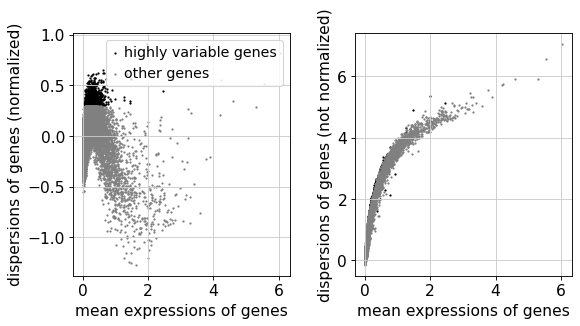

In [50]:
sc.pl.highly_variable_genes(adata)

In [51]:
print(np.sum(adata.var.highly_variable))

917


In [52]:
adata = adata[:, adata.var.highly_variable].copy()

In [53]:
adata.write('./write/GSE102048_lognorm_hvg.h5ad')

# Preliminary processing

In [54]:
adata = sc.read('./write/GSE102048_lognorm_hvg.h5ad')

In [55]:
# scale for pca
sc.pp.scale(adata)
# pca
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


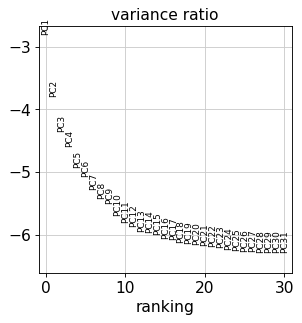

In [56]:
sc.pl.pca_variance_ratio(adata, log=True)

In [57]:
sc.pp.neighbors(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:14)


In [58]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:24)


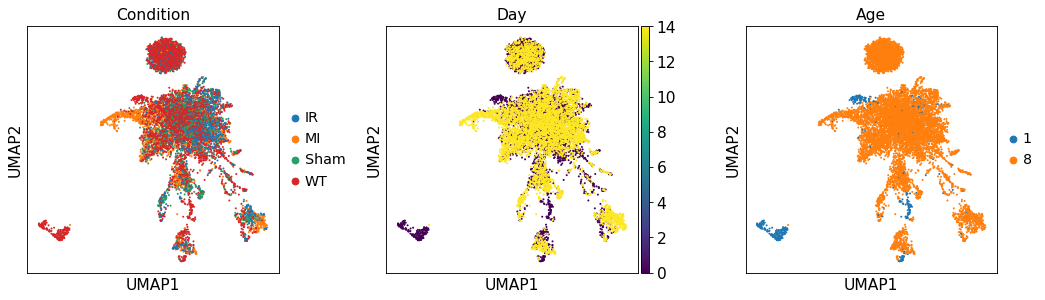

In [59]:
sc.pl.umap(adata, color= ['Condition', 'Day', 'Age'], wspace=0.3)

In [60]:
adata.write('./write/GSE102048_processed.h5ad')

#  Further modify

In [62]:
adata = sc.read('./write/GSE102048_processed.h5ad')

In [63]:
adata.obs['Day'].value_counts()

14    5156
0     4090
Name: Day, dtype: int64

In [64]:
adata.obs['Day'] = adata.obs['Day'].astype(int)

In [65]:
adata.obs['Age'].value_counts()

8    8766
1     480
Name: Age, dtype: int64

In [66]:
adata.obs['Age'] = adata.obs['Age'].astype(int)

In [67]:
adata.obs['Development_stage'].value_counts()

adult       8766
neonatal     480
Name: Development_stage, dtype: int64

In [68]:
adata.obs['Genotype'].value_counts()

Ki67TagRFP    8008
WT            1238
Name: Genotype, dtype: int64

In [69]:
adata.obs['CellType'].value_counts()

heart             2659
infarcted area    2600
ventricles        1431
remote area       1152
apex              1023
apex area          381
Name: CellType, dtype: int64

In [71]:
adata.obs['Tissue'] = adata.obs['CellType']

In [72]:
adata.obs['CellType'] = 'Cardiac cells'

In [74]:
Tissue = {
    'ventricles': 'ventricle',
    'apex': 'apex area'
}

In [75]:
adata.obs['Tissue'] = [Tissue[x] if x in Tissue.keys() else x for x in adata.obs['Tissue']]

In [76]:
adata.obs['Tissue'].value_counts()

heart             2659
infarcted area    2600
ventricle         1431
apex area         1404
remote area       1152
Name: Tissue, dtype: int64

In [78]:
adata.obs['Index'] = adata.obs['StudyID']

In [80]:
adata.obs['Index'].value_counts()

GSM3508688    384
GSM3508686    384
GSM3508685    384
GSM3508683    384
GSM3508687    384
GSM3508684    383
GSM3508682    383
GSM3508678    379
GSM3508679    377
GSM3508676    374
GSM3508680    368
GSM3508675    363
GSM3508677    330
GSM3508681    329
GSM3508674    309
GSM3501497     96
GSM3501506     96
GSM3501505     96
GSM3501504     96
GSM3501503     96
GSM3501500     96
GSM3501498     96
GSM3501489     96
GSM3501496     96
GSM3501495     96
GSM3501494     96
GSM3501492     96
GSM3501491     96
GSM3501490     96
GSM3501508     96
GSM3501488     96
GSM3501507     96
GSM3501513     96
GSM3501509     96
GSM3501515     96
GSM3501521     96
GSM3501519     96
GSM3501518     96
GSM3501510     96
GSM3501516     96
GSM3501517     96
GSM3501514     96
GSM3501512     96
GSM3501511     96
GSM3501487     96
GSM3501499     95
GSM3501501     95
GSM3501502     95
GSM3501520     95
GSM3501493     95
GSM3501522     95
GSM3501524     95
GSM3501523     93
GSM3501525     93
Name: Index, dtype: int64

In [79]:
adata.obs['StudyID'] = 'GSE102048'

In [81]:
adata.obs['Condition'].value_counts()

WT      4090
MI      2281
Sham    1788
IR      1087
Name: Condition, dtype: int64

In [82]:
adata.obs['Condition'] = ['Normal' if 'WT' in x else x for x in adata.obs['Condition']]

In [83]:
adata.obs['Condition'].value_counts()

Normal    4090
MI        2281
Sham      1788
IR        1087
Name: Condition, dtype: int64

In [84]:
adata.write('./write/GSE102048_processed.h5ad')

... storing 'Condition' as categorical
... storing 'CellType' as categorical
... storing 'Tissue' as categorical
... storing 'StudyID' as categorical
